In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import set_matplotlib_hangul
%matplotlib inline
import torch
import tensorflow as tf
import os
import PIL
import shutil

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')



Using cuda device


In [45]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')

In [46]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 기본 경로
train_dir ='C:\\Users\\dkenl\\OneDrive\\바탕 화면\\train2'
test_dir = 'C:\\Users\\dkenl\\OneDrive\\바탕 화면\\test2'

train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=128,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150,150),
                                                           class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=128,
                                                         directory=test_dir,
                                                         target_size=(150,150),
                                                         class_mode='binary')

Found 128 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [47]:
train_data_gen.class_indices

{'gongin': 0, 'samsung': 1}

In [48]:
import tensorflow as tf
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(150, 150, 3)),
    
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [49]:
from tensorflow.keras.optimizers import RMSprop


model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
# 모델 훈련
history = model.fit_generator(train_data_gen, 
                              validation_data=test_data_gen, 
                              epochs=50, 
                              validation_steps=4, 
                              verbose=2)

Epoch 1/50
1/1 - 4s - loss: 0.6978 - accuracy: 0.5000 - val_loss: 29.2365 - val_accuracy: 0.4889
Epoch 2/50
1/1 - 0s - loss: 28.7413 - accuracy: 0.5000
Epoch 3/50
1/1 - 0s - loss: 2.0037 - accuracy: 0.5000
Epoch 4/50
1/1 - 0s - loss: 0.7144 - accuracy: 0.5000
Epoch 5/50
1/1 - 0s - loss: 0.8166 - accuracy: 0.5000
Epoch 6/50
1/1 - 0s - loss: 1.2428 - accuracy: 0.5000
Epoch 7/50
1/1 - 0s - loss: 0.6936 - accuracy: 0.5000
Epoch 8/50
1/1 - 0s - loss: 0.6805 - accuracy: 0.5000
Epoch 9/50
1/1 - 0s - loss: 0.6671 - accuracy: 0.5078
Epoch 10/50
1/1 - 0s - loss: 0.6594 - accuracy: 0.5000
Epoch 11/50
1/1 - 0s - loss: 0.6430 - accuracy: 0.5625
Epoch 12/50
1/1 - 0s - loss: 0.6292 - accuracy: 0.5547
Epoch 13/50
1/1 - 0s - loss: 0.5908 - accuracy: 0.6641
Epoch 14/50
1/1 - 0s - loss: 0.8023 - accuracy: 0.5000
Epoch 15/50
1/1 - 0s - loss: 0.6873 - accuracy: 0.5000
Epoch 16/50
1/1 - 0s - loss: 0.5881 - accuracy: 0.6875
Epoch 17/50
1/1 - 0s - loss: 0.5509 - accuracy: 0.8984
Epoch 18/50
1/1 - 0s - loss: 0

In [50]:
model.evaluate(train_data_gen)

1/1 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8438


[0.4144274592399597, 0.84375]

In [51]:
model.evaluate(test_data_gen)

1/1 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7333


[0.5383687019348145, 0.7333333492279053]

In [52]:
#여기서부터 lime

train_fnames=os.listdir('C:\\Users\\dkenl\\OneDrive\\바탕 화면\\train2\\gongin')
print(train_fnames)
print(len(os.listdir('C:\\Users\\dkenl\\OneDrive\\바탕 화면\\train2\\gongin')))

['공인_002.jpg', '공인_003.jpg', '공인_004.jpg', '공인_005.jpg', '공인_006.jpg', '공인_007.jpg', '공인_008.jpg', '공인_009.jpg', '공인_010.jpg', '공인_011.jpg', '공인_012.jpg', '공인_013.jpg', '공인_014.jpg', '공인_015.jpg', '공인_016.jpg', '공인_017.jpg', '공인_018.jpg', '공인_019.jpg', '공인_020.jpg', '공인_021.jpg', '공인_022.jpg', '공인_023.jpg', '공인_024.jpg', '공인_025.jpg', '공인_026.jpg', '공인_027.jpg', '공인_028.jpg', '공인_029.jpg', '공인_030.jpg', '공인_031.jpg', '공인_032.jpg', '공인_033.jpg', '공인_034.jpg', '공인_035.jpg', '공인_036.jpg', '공인_037.jpg', '공인_038.jpg', '공인_039.jpg', '공인_040.jpg', '공인_041.jpg', '공인_042.jpg', '공인_043.jpg', '공인_044.jpg', '공인_045.jpg', '공인_046.jpg', '공인_047.jpg', '공인_048.jpg', '공인_049.jpg', '공인_050.jpg', '공인_051.jpg', '공인_052.jpg', '공인_053.jpg', '공인_054.jpg', '공인_055.jpg', '공인_056.jpg', '공인_057.jpg', '공인_058.jpg', '공인_059.jpg', '공인_060.jpg', '공인_061.jpg', '공인_062.jpg', '공인_063.jpg', '공인_064.jpg', '공인_065.jpg']
64


In [67]:
train_gongin='C:\\Users\\dkenl\\OneDrive\\바탕 화면\\train2\\gongin'
images=os.listdir('C:\\Users\\dkenl\\OneDrive\\바탕 화면\\train2\\gongin')

a=os.path.join(train_gongin,images[0])
a

'C:\\Users\\dkenl\\OneDrive\\바탕 화면\\train2\\gongin\\공인_002.jpg'

In [68]:
image_path=a
IMG_SIZE = (150,150,3)
def transform_image(image_path, size):
    '''
    Function to transform an image to normalized numpy array
    '''
    img = image.load_img(image_path, target_size=size)
    img = image.img_to_array(img)# Transforming the image to get the shape as [channel, height, width]
    img = np.expand_dims(img, axis=0) # Adding dimension to convert array into a batch of size (1,299,299,3)
    img = img/255.0 # normalizing the image to keep within the range of 0.0 to 1.0
    
    return img

normalized_img = transform_image(image_path, IMG_SIZE)

In [69]:
from lime import lime_image 
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(normalized_img[0], 
                                 model.predict, 
                                 top_labels=1, 
                                 hide_color=0, 
                                 num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

(-0.5, 149.5, 149.5, -0.5)

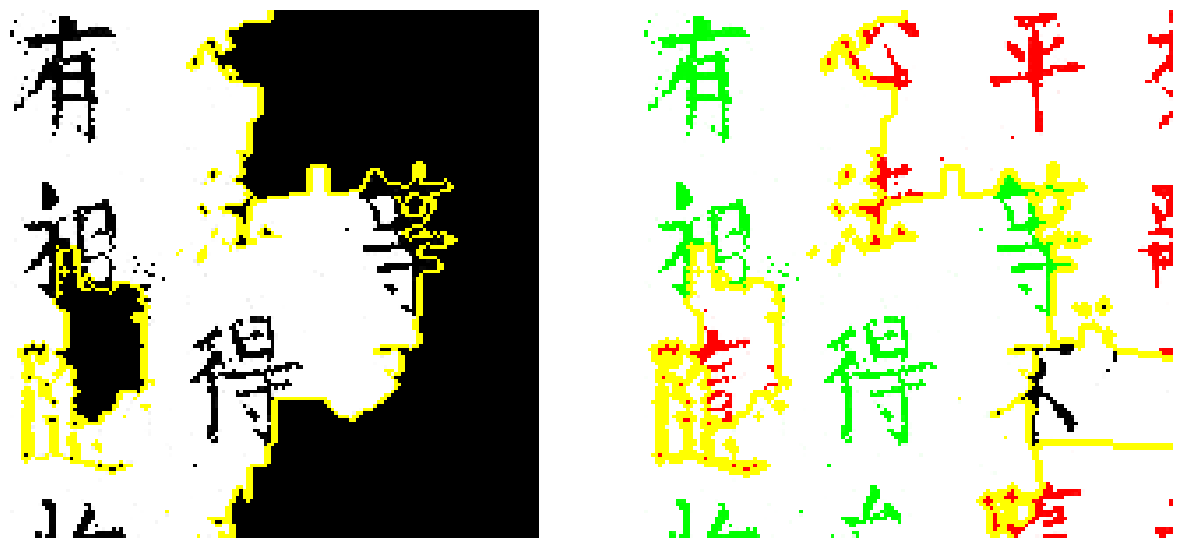

In [70]:
from skimage.segmentation import mark_boundaries 
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], 
    positive_only=True, num_features=5, hide_rest=True) 
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], 
    positive_only=False, num_features=10, hide_rest=False) 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15)) 
ax1.imshow(mark_boundaries(temp_1, mask_1)) 
ax2.imshow(mark_boundaries(temp_2, mask_2)) 
ax1.axis('off')
ax2.axis('off')


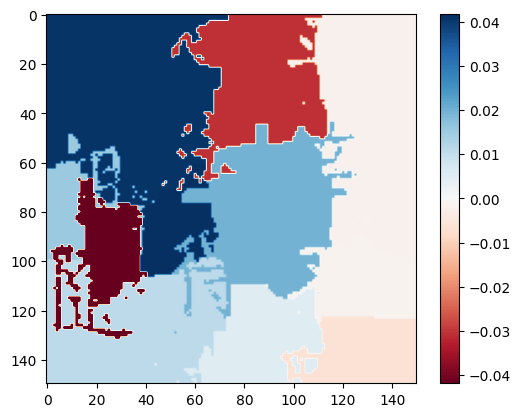

In [71]:
def explanation_heatmap(exp, exp_class):
    '''
    Using heat-map to highlight the importance of each super-pixel for the model prediction
    '''
    dict_heatmap = dict(exp.local_exp[exp_class])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments) 
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()
    plt.show()

explanation_heatmap(explanation, explanation.top_labels[0])